<a href="https://colab.research.google.com/github/Taran-6968/Portfolio/blob/main/Project_Indeed_job_listing_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install beautifulsoup4 requests pandas
from bs4 import BeautifulSoup
import requests
import pandas as pd

url="https://www.octoparse.com/template/indeed-job-listing-scraper"
response=requests.get(url)
print("Status Code:",response.status_code)

Status Code: 200


In [2]:
soup=BeautifulSoup(response.text,"html.parser")
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <title>
   Indeed Job Listing Scraper | Octoparse Templates
  </title>
  <meta content="Indeed Job Listing Scraper" name="keywords"/>
  <meta content="Get job details (location, description, post time, etc.) from Indeed." name="description"/>
  <link href="https://www.octoparse.com/template/indeed-job-listing-scraper" rel="canonical"/>
  <meta content="https://static.octopa


In [3]:
table=soup.find("table")
if table:
    print("Table Found:",table is not None)
else:
    print("Table Found:",table is not None)

Table Found: True


In [4]:

rows = table.find_all('tr')
header_row = rows[0]
headers = header_row.find_all('th')
l=[]
for h in headers[:-2]:
    l.append(h.text.strip())

print(l)


['Country', 'Search_Keyword', 'Search_Location', 'Job_Title', 'Job_Detail_Link', 'ShortDescription', 'Company_Name', 'Location', 'Salary']


In [5]:
rows=table.find_all('tr')
r1=rows[1]
column=r1.find_all('td')
print(f"Job Title: {column[3].text} \nCompany: {column[6].text} \nLocation: {column[7].text} \nSalary: {column[8].text}")

Job Title: Fox Production Supervisor ( Night Shift 6:00pm - 6:00am) 
Company: Ready Foods, Inc. 
Location: Denver, CO 80216 
Salary: $71,758.54 - $118,401.50 a year


In [6]:
job_title=[]
for row in rows[1:]:
  column=row.find_all('td')
  job_title.append(column[3].text.strip())

print(job_title)

['Fox Production Supervisor ( Night Shift 6:00pm - 6:00am)', 'Operations Supervisor - Night shift', 'Warehouse Supervisor', 'Warehouse Supervisor', 'Service Supervisor', 'Well site/Intervention Supervisor/Superintendent - Contract', 'Manufacturing Supervisor - 1st Shift', 'Supervisor, Patient Access', 'Warehouse Supervisor', 'Packing Supervisor']


In [7]:
company=[]
for row in rows[1:]:
  columns=row.find_all('td')
  company.append(f"{columns[3].text.strip()}- {columns[6].text.strip()}")
print(company)

['Fox Production Supervisor ( Night Shift 6:00pm - 6:00am)- Ready Foods, Inc.', 'Operations Supervisor - Night shift- CHEP', 'Warehouse Supervisor- humano', 'Warehouse Supervisor- Insulation Distributors, Inc.', 'Service Supervisor- Cummins Inc.', 'Well site/Intervention Supervisor/Superintendent - Contract- ConocoPhillips', 'Manufacturing Supervisor - 1st Shift- Medtronic', 'Supervisor, Patient Access- Sutter Health', 'Warehouse Supervisor- McGuff Family of Companies', 'Packing Supervisor- Oldcastle BuildingEnvelope, Inc.']


In [8]:

job_details=[]
for row in rows[1:]:
  column=row.find_all('td')
  job_details.append(column[4].text.strip())
print(job_details)

['https://www.indeed.com/rc/clk?jk=b2859c3a7bd10211&bb=WSV0JKw91-PIISrIAlyvGYw_kOFqPkTFBAwelsQfPSmenK1U3mfuhLWsv0zBLqApCngJ0nWX3A-5oJxtDfSAI1a6Fdy9_ze1qO7h9Pih_8QVjqF-SRIq_jfQkoLk-Ucg&xkcb=SoB167M35FSXZ5xOBR0LbzkdCdPP&fccid=9f22abda9adbceeb&vjs=3', 'https://www.indeed.com/rc/clk?jk=1a03ce912ecbb5bc&bb=WSV0JKw91-PIISrIAlyvGVmkw9Cn1Q1aMcemEUUHgWJ-LgTGyYWQfMIsTGqNyAYlkixwnkuWGZi4wkxcIEjsrOmR3UxIRc95iM1-CEGKg_h1zQ1lohbZ0u1_ua-PE8pW&xkcb=SoDB67M35FSXZ5xOBR0KbzkdCdPP&fccid=25ed7242fa1eb0a0&cmp=CHEP-USA&ti=Operations+Supervisor&vjs=3', 'https://www.indeed.com/rc/clk?jk=5b80f1f6327e10b5&bb=WSV0JKw91-PIISrIAlyvGTOaV1icfyfCu1_RKVDfaZaX194Rs-6Q-4tiJ_NDO7Ewt3CNdcRwnuPmJChcwcMlyKBIYUus6zGeeG4v99hPfDIGa1aI7RsuEunTiuRCnXuzmzBkd8TilcU%3D&xkcb=SoBc67M35FSXZ5xOBR0JbzkdCdPP&fccid=203cd175678da2c0&vjs=3', 'https://www.indeed.com/rc/clk?jk=49e8bebc0a0e605f&bb=WSV0JKw91-PIISrIAlyvGWAPLcKR-TyYmlPWhbDGe_bGWlgeWW7a1D1DU0dHsdU69YeFjKip_Zp4PI95Jmp0oTpnXk5KYiBcSaj8PLHLMlGDkbictNTWQTs_7S6-Ioxj&xkcb=SoDo67M35FSXZ5x

In [9]:
salary=[]
for row in rows[1:]:
  column=row.find_all('td')
  salary.append(column[8].text.strip())
print(salary)

['$71,758.54 - $118,401.50 a year', '$60,000 - $75,000 a year', '', '$62,600 - $87,700 a year', '$74,800 - $112,200 a year', '', '$68,800 - $103,200 a year', '$42.08 - $63.13 an hour', '$25 - $35 an hour', '']


In [10]:
import pandas as pd
data=[]
for row in rows[1:]:
  cells=row.find_all('td')
  data.append({
        "Job Title": cells[3].text.strip(),
        "Job Detail Link": cells[4].text.strip(),
        "Company Name": cells[6].text.strip(),
        "Location": cells[7].text.strip(),
        "Salary": cells[8].text.strip(),
    })

df=pd.DataFrame(data)
print(df)

                                           Job Title  \
0  Fox Production Supervisor ( Night Shift 6:00pm...   
1                Operations Supervisor - Night shift   
2                               Warehouse Supervisor   
3                               Warehouse Supervisor   
4                                 Service Supervisor   
5  Well site/Intervention Supervisor/Superintende...   
6               Manufacturing Supervisor - 1st Shift   
7                         Supervisor, Patient Access   
8                               Warehouse Supervisor   
9                                 Packing Supervisor   

                                     Job Detail Link  \
0  https://www.indeed.com/rc/clk?jk=b2859c3a7bd10...   
1  https://www.indeed.com/rc/clk?jk=1a03ce912ecbb...   
2  https://www.indeed.com/rc/clk?jk=5b80f1f6327e1...   
3  https://www.indeed.com/rc/clk?jk=49e8bebc0a0e6...   
4  https://www.indeed.com/rc/clk?jk=5b5095ead0905...   
5  https://www.indeed.com/rc/clk?jk=d0e69ebc5b4

In [11]:
df.to_csv('indeed_job_listings.csv', index=False)

In [12]:
import pandas as pd
df=pd.read_csv('indeed_job_listings.csv')
print(df.head())

                                           Job Title  \
0  Fox Production Supervisor ( Night Shift 6:00pm...   
1                Operations Supervisor - Night shift   
2                               Warehouse Supervisor   
3                               Warehouse Supervisor   
4                                 Service Supervisor   

                                     Job Detail Link  \
0  https://www.indeed.com/rc/clk?jk=b2859c3a7bd10...   
1  https://www.indeed.com/rc/clk?jk=1a03ce912ecbb...   
2  https://www.indeed.com/rc/clk?jk=5b80f1f6327e1...   
3  https://www.indeed.com/rc/clk?jk=49e8bebc0a0e6...   
4  https://www.indeed.com/rc/clk?jk=5b5095ead0905...   

                    Company Name               Location  \
0              Ready Foods, Inc.       Denver, CO 80216   
1                           CHEP      Livonia, MI 48150   
2                         humano   Ridgeville, SC 29472   
3  Insulation Distributors, Inc.   Foxborough, MA 02035   
4                   Cummins Inc

In [13]:
import sqlite3
conn=sqlite3.connect('jobs_database.db')
df.to_sql('Jobs',conn,if_exists='replace',index=False)
print('Data has been successfully inserted into the Jobs table.')
conn.close()

Data has been successfully inserted into the Jobs table.


In [14]:
conn=sqlite3.connect('jobs_database.db')
query=(''' SELECT * FROM Jobs;''')
data=pd.read_sql(query,conn)
print(data)
conn.close()

                                           Job Title  \
0  Fox Production Supervisor ( Night Shift 6:00pm...   
1                Operations Supervisor - Night shift   
2                               Warehouse Supervisor   
3                               Warehouse Supervisor   
4                                 Service Supervisor   
5  Well site/Intervention Supervisor/Superintende...   
6               Manufacturing Supervisor - 1st Shift   
7                         Supervisor, Patient Access   
8                               Warehouse Supervisor   
9                                 Packing Supervisor   

                                     Job Detail Link  \
0  https://www.indeed.com/rc/clk?jk=b2859c3a7bd10...   
1  https://www.indeed.com/rc/clk?jk=1a03ce912ecbb...   
2  https://www.indeed.com/rc/clk?jk=5b80f1f6327e1...   
3  https://www.indeed.com/rc/clk?jk=49e8bebc0a0e6...   
4  https://www.indeed.com/rc/clk?jk=5b5095ead0905...   
5  https://www.indeed.com/rc/clk?jk=d0e69ebc5b4

In [15]:
conn=sqlite3.connect('jobs_database.db')
query=('''SELECT `Company Name`, COUNT(`Company Name`) AS Job_Count from Jobs
GROUP BY `Company Name`
ORDER BY  COUNT(`Company Name`) DESC''')
most_jobs=pd.read_sql(query,conn)
print(most_jobs)
conn.close()

                       Company Name  Job_Count
0                            humano          1
1                     Sutter Health          1
2                 Ready Foods, Inc.          1
3  Oldcastle BuildingEnvelope, Inc.          1
4                         Medtronic          1
5        McGuff Family of Companies          1
6     Insulation Distributors, Inc.          1
7                      Cummins Inc.          1
8                    ConocoPhillips          1
9                              CHEP          1


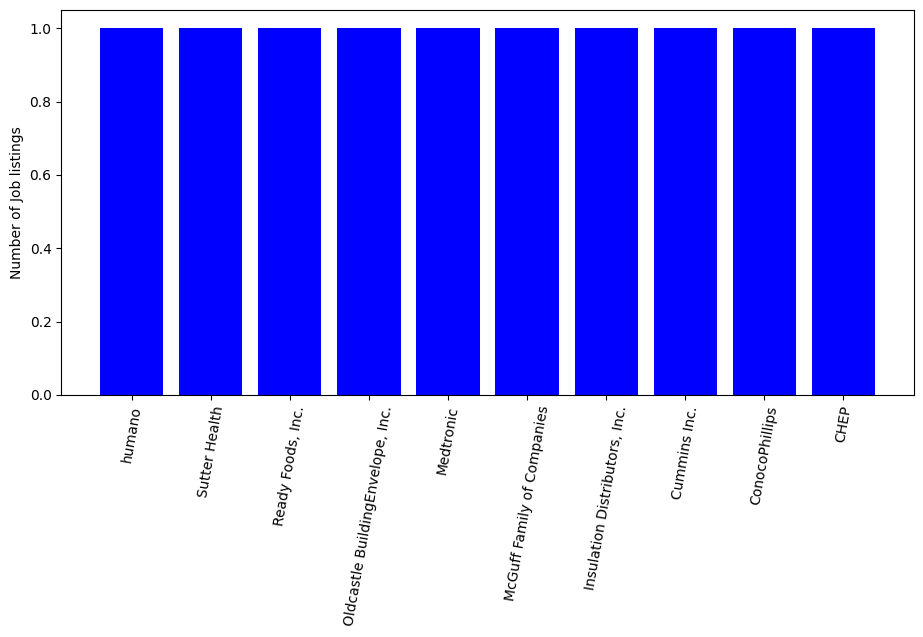

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(11,5))
plt.bar(most_jobs['Company Name'], most_jobs['Job_Count'],color='blue')
plt.ylabel('Number of Job listings')
plt.xticks(rotation=80)
plt.show()

In [17]:
conn=sqlite3.connect('jobs_database.db')
query=(' SELECT `Job Title`, `Company Name`, Location, Salary FROM Jobs WHERE Location="San Francisco, CA 94109" ')
san_francisco=pd.read_sql(query,conn)
print(san_francisco)
conn.close()

                    Job Title   Company Name                 Location  \
0  Supervisor, Patient Access  Sutter Health  San Francisco, CA 94109   

                    Salary  
0  $42.08 - $63.13 an hour  


In [18]:


conn=sqlite3.connect('jobs_database.db')
query=(' SELECT `Job Title`, `Company Name`, Location, Salary FROM Jobs WHERE Salary IS NULL OR Salary="" ')
null_salary=pd.read_sql(query,conn)
print(f"Total jobs without salary information: {len(null_salary)}\n {null_salary}")
conn.close()

Total jobs without salary information: 3
                                            Job Title  \
0                               Warehouse Supervisor   
1  Well site/Intervention Supervisor/Superintende...   
2                                 Packing Supervisor   

                       Company Name              Location Salary  
0                            humano  Ridgeville, SC 29472   None  
1                    ConocoPhillips           Midland, TX   None  
2  Oldcastle BuildingEnvelope, Inc.     Terrell, TX 75160   None  


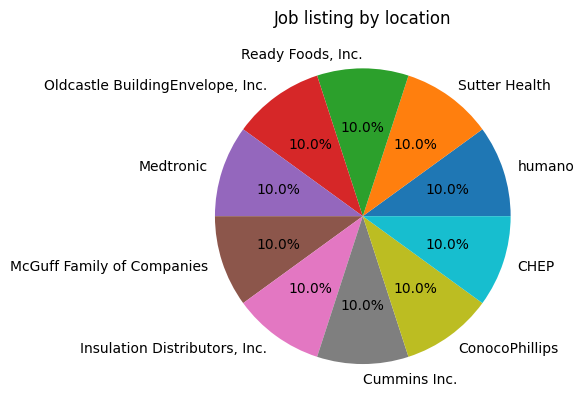

In [19]:
plt.pie(most_jobs['Job_Count'],labels=most_jobs['Company Name'],autopct="%1.1f%%")
plt.title("Job listing by location")
plt.show()